# Python Advanced. Pandas. Домашнее задание (HW)
## 0. Импорт модулей
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import io

## 1. Загрузка файлов и форматирование
---

In [2]:
train = pd.read_csv('train_old.csv', sep=',', index_col=0,
                       dtype = {'row_id': 'int64', 'timestamp': 'int64', 'user_id': 'int32', 'content_id': 'int16',
                                'content_type_id': 'int8', 'task_container_id': 'int16', 'user_answer': 'int8',
                                'answered_correctly': 'int8', 'prior_question_elapsed_time': 'float32',
                                'prior_question_had_explanation': 'boolean'})
print(1)

1


In [3]:
train.head(10)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
5,157063,115,156,0,5,2,1,5000.0,False
6,176092,115,51,0,6,0,1,17000.0,False
7,194190,115,50,0,7,3,1,17000.0,False
8,212463,115,7896,0,8,2,1,16000.0,False


In [53]:
lectures = pd.read_csv('lectures.csv', sep=',', dtype = {'lecture_id': 'int16', 'tag': 'int16', 'part': 'int8', 'type_of': 'object'})
lectures.head(10)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
5,335,114,2,concept
6,484,179,5,concept
7,641,134,6,solving question
8,761,93,1,concept
9,814,80,5,solving question


In [5]:
questions = pd.read_csv('questions.csv', dtype = {'question_id': 'int16', 'bundle_id': 'int16', 'correct_answer': 'int8',
                                 'part': 'int8', 'tags': 'object'})
questions.head(10)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
5,5,5,2,1,131 149 162 81
6,6,6,2,1,10 94 162 92
7,7,7,0,1,61 110 162 29
8,8,8,3,1,131 13 162 92
9,9,9,3,1,10 164 81


Последний столбец приводится к типу int, предварительно переведя значения None в False.

In [6]:
length = train.shape[0]
for i in range(length):
    if pd.isna(train['prior_question_had_explanation'][i]) == True:
        train['prior_question_had_explanation'][i] = False
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('int8')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  int8   
dtypes: float32(1), int16(2), int32(1), int64(1), int8(4)
memory usage: 3.0 GB


## 2. Анализируем данные из Train
---
Посмотрим, какую часть от материалов занимают лекции, а какую - вопросы.

In [8]:
materials_count = train.content_id.nunique()
lections_count = train[train.content_type_id == True].content_id.nunique()
questions_count = train[train.content_type_id == False].content_id.nunique()

print('Все материалы:', materials_count)
print('Лекции:', lections_count)
print('Вопросы:', questions_count)

Все материалы: 13782
Лекции: 415
Вопросы: 13523


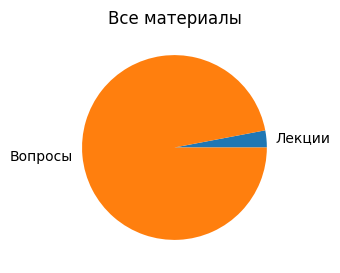

In [9]:
plt.figure(figsize = (5, 3))
plt.title('Все материалы')
plt.pie([lections_count, questions_count], labels = ['Лекции', 'Вопросы'])
plt.show()

Создадим рейтинг наиболеее просматриваемых вопросов

C:\Users\notko\AppData\Local\Temp\ipykernel_9316\3499979477.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  content = train['content_id'].value_counts()[0:25]


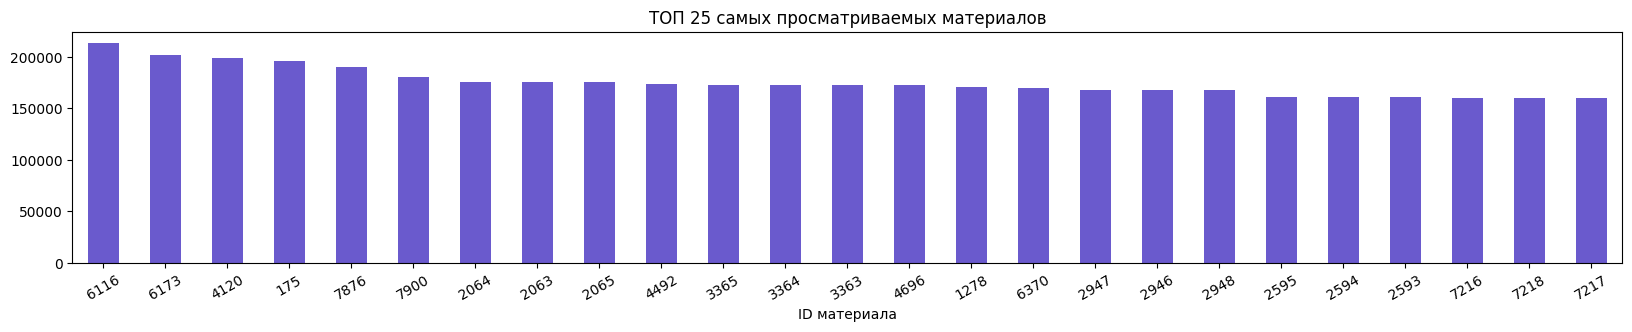

In [10]:
content = train['content_id'].value_counts()[0:25]
plt.figure(figsize = (20, 3))
content.plot.bar(x = content.index, y = content.values, color = 'slateblue')
plt.title('ТОП 25 самых просматриваемых материалов')
plt.xlabel('ID материала')
plt.xticks(rotation=30)
plt.show()

Рассмотрим уникальные значения для разных колонок таблицы и посмотрим на их количество

In [11]:
uniq = list()
cols = train.columns
for col in cols:
    item = (col, train[col].nunique(), train[col].dtype)
    uniq.append(item)
unique_counts = pd.DataFrame(uniq,
                             columns=['Column_Name', 'Num_Unique', 'Type']
                            ).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts)

,Column_Name,Num_Unique,Type
0,content_type_id,2,int8
1,prior_question_had_explanation,2,int8
2,answered_correctly,3,int8
3,user_answer,5,int8
4,prior_question_elapsed_time,3258,float32
5,task_container_id,10000,int16
6,content_id,13782,int16
7,user_id,393656,int32
8,timestamp,72821015,int64


Исследуем активность студентов на лекции и во время ответов на вопросы:

In [12]:
train['content_type_id'].value_counts(normalize=True)
values = [train['content_type_id'].value_counts()[0], train['content_type_id'].value_counts()[1]]
sum_act = values[0] + values[1]
act_answering = round(values[0] / sum_act * 100, 1)
act_lectures = round(values[1] / sum_act * 100, 1)
print('Ответы на вопросы :', act_answering, '%')
print('Активность на лекциях :', act_lectures, '%')

Ответы на вопросы : 98.1 %
Активность на лекциях : 1.9 %


Исследуем, зависит ли количество правильных ответов от времени с начала сессии и среднего  задтраченного времени для ответа на вопрос

In [13]:
depends = pd.DataFrame({'timestamp': train[train['answered_correctly'] != -1]['timestamp'].groupby(train['answered_correctly']).mean(),
              'prior_questions_time': train[train['answered_correctly'] != -1]['prior_question_elapsed_time'].groupby(train['answered_correctly']).mean(),})

display(depends)

,timestamp,prior_questions_time
answered_correctly,,
0,7.235711e+09,25641.992188
1,7.945270e+09,25309.976562


Среднее время, затрачиваемое на вопрос:

In [14]:
round(train['prior_question_elapsed_time'].mean(), 2)

25423.84

Среднее число просмотренных лекций:

In [15]:
round(train[train['content_type_id'] == 1].shape[0] / train['user_id'].nunique(), 2)

4.98

Среднее число просмотренных объяснений:

In [16]:
round(train['prior_question_had_explanation'].sum() / train['user_id'].nunique(), 2)

227.83

Среднее кол-во правильных ответов:

In [17]:
round(train[train['answered_correctly'] != -1]['answered_correctly'].sum() / train['user_id'].nunique(), 2)


165.74

---
## 3. Анализируем данные из Questions
---

In [18]:
unique = list()
for col in questions.columns:
    item = (col, questions[col].nunique(), questions[col].dtype)
    unique.append(item)
unique_counts_q = pd.DataFrame(unique,
                               columns=['Column_Name', 'Num_Unique', 'Type']
                              ).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts)

,Column_Name,Num_Unique,Type
0,content_type_id,2,int8
1,prior_question_had_explanation,2,int8
2,answered_correctly,3,int8
3,user_answer,5,int8
4,prior_question_elapsed_time,3258,float32
5,task_container_id,10000,int16
6,content_id,13782,int16
7,user_id,393656,int32
8,timestamp,72821015,int64


In [21]:
questions['tags'] = questions['tags'].astype(str)

tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print('Количество различных тегов :', len(tags))

Количество различных тегов : 188


Рассмотрим количество вопросов относительно разных секций и долю верных ответов для каждой секции.

Text(0.5, 0, '№ секции')

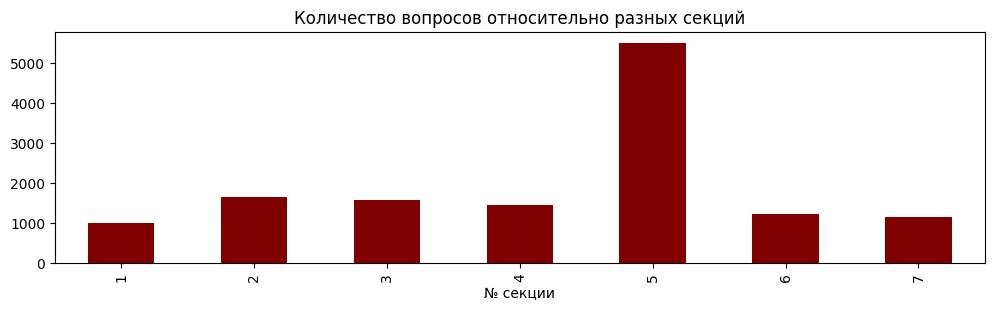

In [30]:
plt.figure(figsize=(12,3))
sect = questions.groupby("part").count()['question_id']
sect.plot.bar(color='maroon')
plt.title("Количество вопросов относительно разных секций")
plt.xlabel("№ секции")



---
## 4. Анализируем данные из Lections
---

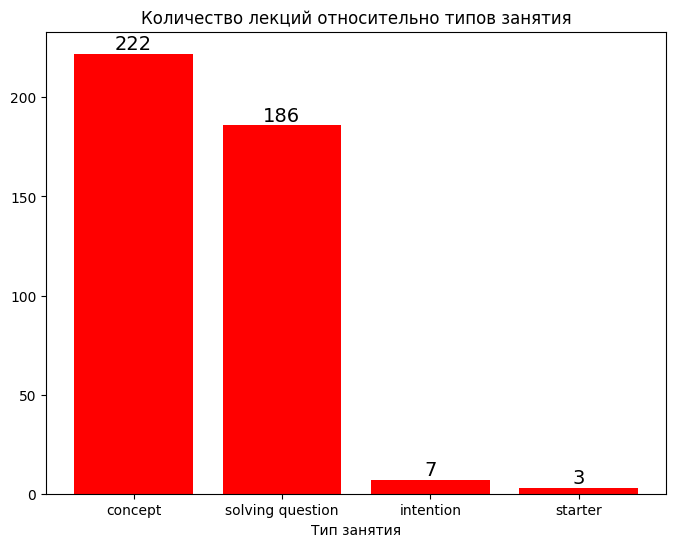

In [54]:
type = lectures.type_of.value_counts()
fig = plt.figure(figsize = (8, 6))
plt.bar(type.index, type.values, color = 'red')
for i, v in zip(type.index, type.values):
    plt.text(i, v, v, fontsize=14, va='bottom', ha='center')
plt.title("Количество лекций относительно типов занятия")
plt.xlabel("Тип занятия")
plt.show()

Посчитаем количество просмотров лекций для каждо и внесем полученные данные в таблицу Lectures.

In [55]:
lections_list = list(train[train['content_type_id'] == 1]['content_id'].unique())
views = list()
for elem in lections_list:
    views.append(train[(train['content_id'] == elem)]['content_id'].count())
lections_df = pd.DataFrame({'lecture_id': lections_list,
                        'l_quant': views })
lections_df = lections_df.astype({'lecture_id': 'int16', 'l_quant': 'int32'})

lectures = pd.merge(lectures, lections_df, how='inner')
display(lectures)

,lecture_id,tag,part,type_of,l_quant
0,89,159,5,concept,24468
1,100,70,1,concept,18284
2,185,45,6,concept,47470
3,192,79,5,solving question,11073
4,317,156,5,solving question,11161
...,...,...,...,...,...
410,32535,8,5,solving question,3666
411,32570,113,3,solving question,2910
412,32604,24,6,concept,4
413,32625,142,2,concept,8031


Выведем рейтинг 15 самых популярных лекций.

In [56]:
lectures.sort_values(by=['l_quant'], ascending=False).head(15)

,lecture_id,tag,part,type_of,l_quant
124,10688,39,7,concept,133046
5,335,114,2,concept,60616
44,3852,161,4,solving question,57766
2,185,45,6,concept,47470
62,5694,140,2,concept,46255
37,3153,62,2,intention,43979
53,4425,1,6,concept,37369
60,5266,157,3,concept,36066
85,7926,57,5,concept,34520
61,5588,132,6,concept,34410
